In [1]:
import MIMENet
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [2]:
#set path to simulation data
simulation_path = "/mnt/d/data/MIME_data/simData/dmMIME/lowSpecies"

In [3]:
#set training parameters
training_path = simulation_path+'/data/trainingData.txt'
test_path = simulation_path+'/data/testData.txt'
epochs = 20
learning_rate = 0.0001
batch_size = 128
lambda_l1 = 0.00007
hidden_size_factor = 5
bottleneck = 1/5

In [4]:
model, train_history, test_history, mae_train_history, mae_test_history = MIMENet.train(training_path, test_path, epochs, learning_rate, batch_size, lambda_l1, hidden_size_factor, bottleneck)

Device: cuda:0
Epoch: 1/20


100%|██████████| 969/969 [00:07<00:00, 130.03it/s]


Epoch: 2/20


100%|██████████| 969/969 [00:06<00:00, 146.47it/s]


Epoch: 3/20


100%|██████████| 969/969 [00:06<00:00, 143.55it/s]


Epoch: 4/20


100%|██████████| 969/969 [00:06<00:00, 150.51it/s]


Epoch: 5/20


100%|██████████| 969/969 [00:06<00:00, 154.14it/s]


Epoch: 6/20


100%|██████████| 969/969 [00:06<00:00, 155.42it/s]


Epoch: 7/20


100%|██████████| 969/969 [00:06<00:00, 151.21it/s]


Epoch: 8/20


100%|██████████| 969/969 [00:06<00:00, 146.54it/s]


Epoch: 9/20


100%|██████████| 969/969 [00:06<00:00, 142.69it/s]


Epoch: 10/20


100%|██████████| 969/969 [00:06<00:00, 143.13it/s]


Epoch: 11/20


100%|██████████| 969/969 [00:06<00:00, 141.19it/s]


Epoch: 12/20


100%|██████████| 969/969 [00:07<00:00, 128.65it/s]


Epoch: 13/20


100%|██████████| 969/969 [00:07<00:00, 138.28it/s]


Epoch: 14/20


100%|██████████| 969/969 [00:07<00:00, 131.28it/s]


Epoch: 15/20


100%|██████████| 969/969 [00:07<00:00, 130.97it/s]


Epoch: 16/20


100%|██████████| 969/969 [00:06<00:00, 140.29it/s]


Epoch: 17/20


100%|██████████| 969/969 [00:06<00:00, 142.18it/s]


Epoch: 18/20


100%|██████████| 969/969 [00:06<00:00, 144.66it/s]


Epoch: 19/20


100%|██████████| 969/969 [00:06<00:00, 138.97it/s]


Epoch: 20/20


100%|██████████| 969/969 [00:07<00:00, 134.59it/s]


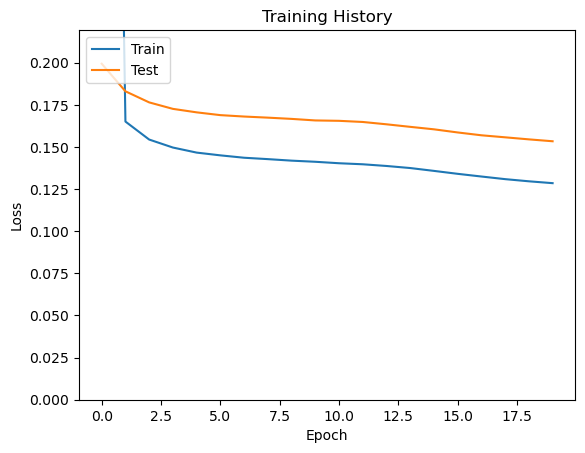

In [15]:
#plot training history
plt.plot(train_history)
plt.plot(test_history)
plt.title("Training History")
plt.ylabel("Loss")
plt.xlabel("Epoch")
#scale y axis to ignore training loss of first epoch
plt.ylim(0, max(test_history)*1.1)
plt.legend(["Train", "Test"], loc="upper left")
plt.show()

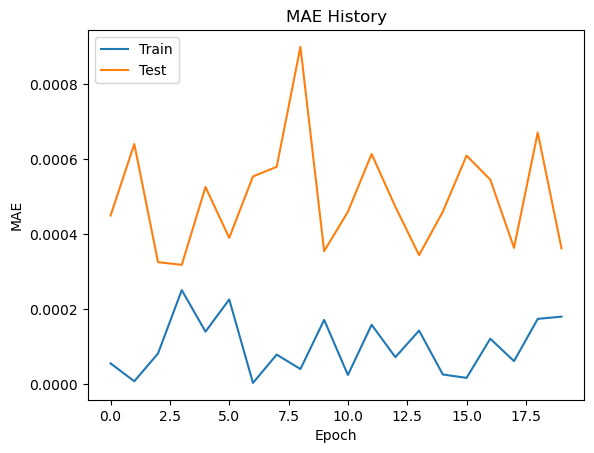

In [6]:
#plot mae history
plt.plot(mae_train_history)
plt.plot(mae_test_history)
plt.title("MAE History")
plt.ylabel("MAE")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"], loc="upper left")
plt.show()

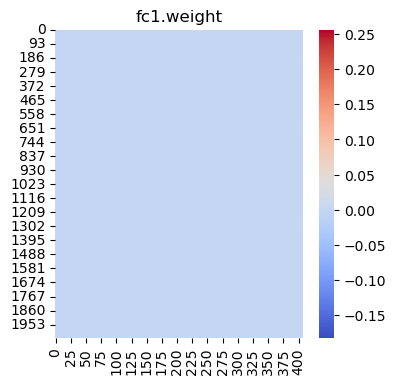

max weight value:  0.25631016
min weight value:  -0.18231995
number of pruned weights:  480663
number of non zero weights:  351657


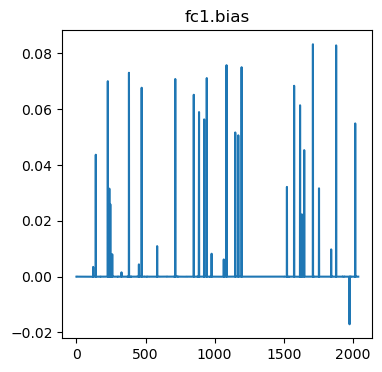

max bias value:  0.08327397
min bias value:  -0.017062176
number of pruned biases:  1098
number of non zero biases:  942


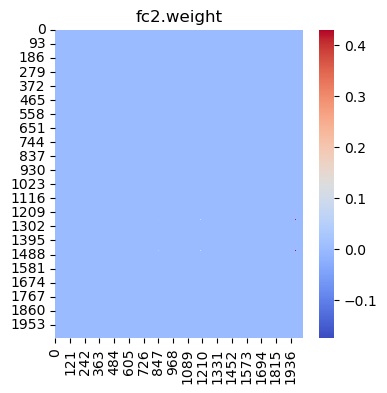

max weight value:  0.4302272
min weight value:  -0.17319709
number of pruned weights:  1992817
number of non zero weights:  2168783


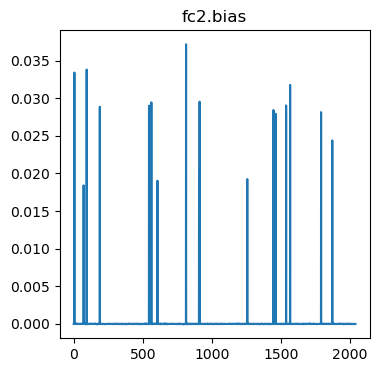

max bias value:  0.037163917
min bias value:  -4.519357e-05
number of pruned biases:  1149
number of non zero biases:  891


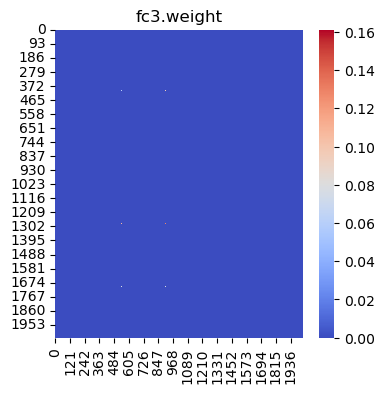

max weight value:  0.161172
min weight value:  -4.910755e-05
number of pruned weights:  1948532
number of non zero weights:  2213068


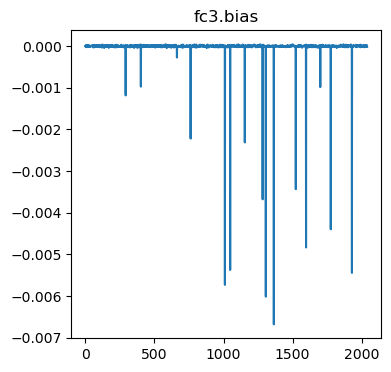

max bias value:  4.4865457e-05
min bias value:  -0.006677815
number of pruned biases:  1120
number of non zero biases:  920


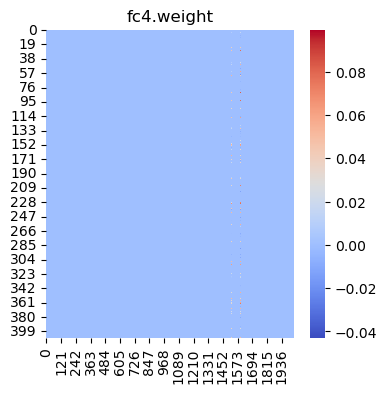

max weight value:  0.0993796
min weight value:  -0.04292213
number of pruned weights:  437341
number of non zero weights:  394979


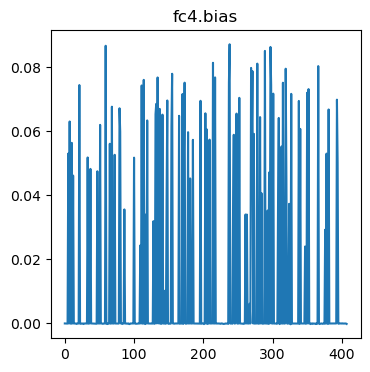

max bias value:  0.08710501
min bias value:  -0.00024281141
number of pruned biases:  139
number of non zero biases:  269


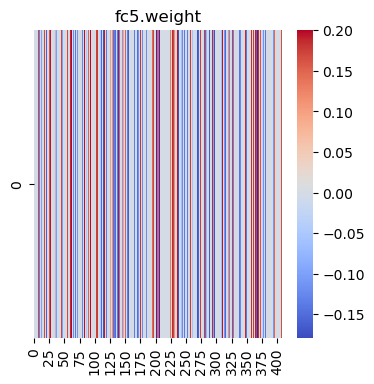

max weight value:  0.20076787
min weight value:  -0.17881751
number of pruned weights:  139
number of non zero weights:  269


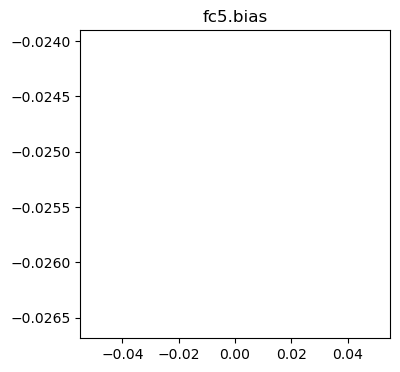

max bias value:  -0.025294805
min bias value:  -0.025294805
number of pruned biases:  0
number of non zero biases:  1


In [7]:
for name, param in model.named_parameters():
    #if weight is not a bias
    if 'bias' not in name:
        #reshape weights to 2d array
        weight = param.data.cpu().numpy().reshape(param.data.cpu().numpy().shape[0], param.data.cpu().numpy().shape[1])
        #plot heatmap of weights
        plt.figure(figsize=(4,4))
        sns.heatmap(weight, cmap='coolwarm')
        plt.title(name)
        plt.show()

        print('max weight value: ', np.max(weight))
        print('min weight value: ', np.min(weight))
        #print('number of weights: ', weight.size)
        print('number of pruned weights: ', np.sum(weight == 0))
        print('number of non zero weights: ', np.sum(weight != 0))

    else:
        bias = param.data.cpu().numpy()
        #plot histogram of biases
        plt.figure(figsize=(4,4))
        sns.lineplot(bias.flatten())
        plt.title(name)
        plt.show()
 
        print('max bias value: ', np.max(bias))
        print('min bias value: ', np.min(bias))
        #print('number of biases: ', bias.size)
        print('number of pruned biases: ', np.sum(bias == 0))
        print('number of non zero biases: ', np.sum(bias != 0))

In [8]:
# read in kd values
kds = np.loadtxt(simulation_path+'/secondFromProt1/prot1/single_kds.txt')

#insert 1 at position 0 and then every 3rd position
kds = np.insert(kds, 0, 1)
kds = np.insert(kds, np.arange(4, len(kds), 3), 1)
kds[0:10]

array([1.      , 0.324353, 0.857232, 0.868419, 1.      , 0.44322 ,
       1.      , 1.      , 1.      , 2.26238 ])

In [9]:
predictions = []
prediction_example = np.zeros(len(kds)+8)
for i in range(8, len(kds)+8):
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    current_prediction_example = prediction_example.copy()
    current_prediction_example[i] = 1
    current_prediction_example = torch.from_numpy(current_prediction_example).float()
    current_prediction_example = current_prediction_example.to(device)
    #output binding probability and append list for given protein concentration combination
    with torch.no_grad():
        output = model(current_prediction_example)
        predictions.append(output.item())

predictions[0:10]

[0.5647339820861816,
 0.6816242337226868,
 0.5692741274833679,
 0.5112310647964478,
 0.5646799802780151,
 0.7520774006843567,
 0.7155759334564209,
 0.5979109406471252,
 0.5648775696754456,
 0.5401647090911865]

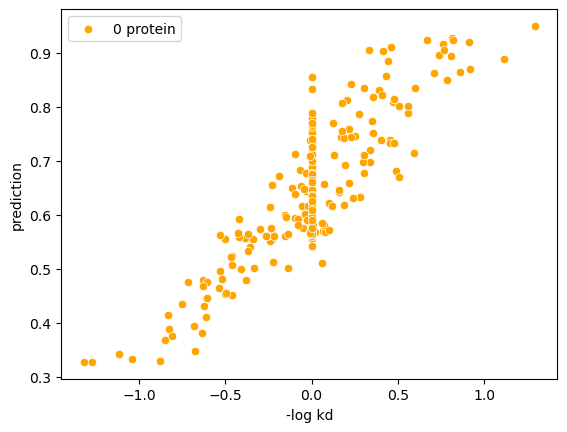

In [10]:
#two plots -log kd vs predictionZeroConc and predictionOneConc
sns.scatterplot(x=-np.log10(kds), y=predictions, label='0 protein', color='orange')
plt.xlabel('-log kd')
plt.ylabel('prediction')
plt.show()